# Introduction about dataset

<p><b>Intracranial hemorrhage🧠 (ICH)</b> is caused by bleeding within the brain tissue itself — a life-threatening type of stroke. A stroke occurs when the brain is deprived of oxygen and blood supply. ICH is most commonly caused by hypertension, arteriovenous malformations, or head trauma. Treatment focuses on stopping the bleeding, removing the blood clot (hematoma), and relieving the pressure on the brain.</p>
<br/><br/>
<p><b>Diagnosis</b> requires an urgent procedure. When a patient shows acute neurological symptoms such as severe headache or loss of consciousness, highly trained specialists review medical images of the patient’s cranium to look for the presence, location and type of hemorrhage. The process is complicated and often time consuming.</p>
<br/><br/>
<p>The current clinical protocol to diagnose Intracranial hemorrhage🧠 ICH is examining Computerized Tomography (CT) scans by radiologists to detect ICH and localize its regions. However, this process relies heavily on the availability of an experienced radiologist.CT images are examined by an expert radiologist to determine whether ICH has occurred and if so, detect its type and region. However, this diagnosis process relies on the availability of a subspecialty-trained neuroradiologist, and as a result, could be time inefficient and even inaccurate, especially in remote areas where specialized care is scarce.</p>
<br/><br/>
<p>In Recent years ,the Advancement in <b>Deep learning</b> has enable us to solve various problem, even in some cases it shows us better results than humans.we will try to solve Intracranical hemorrhage detection and segmentation using CT scan dataset of brain which is annoted by expert radiologists. </p>
<p>The challenge is to build an algorithm to detect acute intracranial hemorrhage and its subtypes.</p>


>Intraparenchymal hemorrhage is blood that is located completely within the brain itself; intraventricular or subarachnoid hemorrhage is blood that has leaked into the spaces of the brain that normally contain cerebrospinal fluid (the ventricles or subarachnoid cisterns). Extra-axial hemorrhages are blood that collects in the tissue coverings that surround the brain (e.g. subdural or epidural subtypes). ee figure.) Patients may exhibit more than one type of cerebral hemorrhage, which c may appear on the same image. While small hemorrhages are less morbid than large hemorrhages typically, even a small hemorrhage can lead to death because it is an indicator of another type of serious abnormality (e.g. cerebral aneurysm).
>
> #### There are four types of ICH:
>    * **Intraparenchymal hemorrhage**
>    * **Epidural hemorrhage**
>    * **Subdural hemorrhage**
>    * **Subarachnoid hemorrhage**
>    * **intraventricular hemorrhage**
>
> one patient can exibits more than one type of hemorrhage

![file](https://user-images.githubusercontent.com/58046531/89164136-4eac1d00-d594-11ea-9408-6d271518b3a7.png)


This datset have six classes 
1. any - any of five class of hemorrhage is present or not in patient
2. epidural
3. intraparenchymal
4. intraventricular 
5. subarachnoid
6. subdural

It is possible that one patient have more than type of hemorrhage.

In [1]:
base_url = '~/kaggle/rsna-intracranial-hemorrhage-detection/'

In [3]:
TRAIN_DIR = '/home/ubuntu/kaggle/rsna-intracranial-hemorrhage-detection/stage_2_train'
TEST_DIR = '/home/ubuntu/kaggle/rsna-intracranial-hemorrhage-detection/stage_2_test'

In [4]:
import os
import pandas as pd
import numpy as np
from tqdm import *
import re
import seaborn as sns

In [5]:
! ls {TRAIN_DIR} | wc -l


752803


In [6]:
! ls {TEST_DIR} | wc -l

121232


In [7]:
! ls {TRAIN_DIR} | head -n 5

ID_000012eaf.dcm
ID_000039fa0.dcm
ID_00005679d.dcm
ID_00008ce3c.dcm
ID_0000950d7.dcm
ls: write error: Broken pipe


In [8]:
train_df = pd.read_csv(base_url+'stage_2_train.csv')
print(train_df.shape)
train_df.head(10)

(4516842, 2)


,ID,Label
0,ID_12cadc6af_epidural,0
1,ID_12cadc6af_intraparenchymal,0
2,ID_12cadc6af_intraventricular,0
3,ID_12cadc6af_subarachnoid,0
4,ID_12cadc6af_subdural,0
5,ID_12cadc6af_any,0
6,ID_38fd7baa0_epidural,0
7,ID_38fd7baa0_intraparenchymal,0
8,ID_38fd7baa0_intraventricular,0
9,ID_38fd7baa0_subarachnoid,0


In [9]:
train_df[['ID', 'Subtype']] = train_df['ID'].str.rsplit(pat='_', n=1, expand=True)
print(train_df.shape)


(4516842, 3)


Here if we look then we find that each image have output for each class as True(1) or False(0) mean single image have six duplicate image.so we will convert them into one_hot_encoder and then single image will have single row.

In [10]:
train_df.tail(6)

,ID,Label,Subtype
4516836,ID_4a85a3a3f,0,epidural
4516837,ID_4a85a3a3f,0,intraparenchymal
4516838,ID_4a85a3a3f,0,intraventricular
4516839,ID_4a85a3a3f,0,subarachnoid
4516840,ID_4a85a3a3f,0,subdural
4516841,ID_4a85a3a3f,0,any


In [11]:
def fix_id(img_id, img_dir=TRAIN_DIR):
    if not re.match(r'ID_[a-z0-9]+', img_id):
        sop = re.search(r'[a-z0-9]+', img_id)
        if sop:
            img_id_new = f'ID_{sop[0]}'
            return img_id_new
        else:
            print(img_id)
    return img_id

In [14]:
train_df['ID'].apply(fix_id)

0          ID_12cadc6af
1          ID_12cadc6af
2          ID_12cadc6af
3          ID_12cadc6af
4          ID_12cadc6af
               ...     
4516837    ID_4a85a3a3f
4516838    ID_4a85a3a3f
4516839    ID_4a85a3a3f
4516840    ID_4a85a3a3f
4516841    ID_4a85a3a3f
Name: ID, Length: 4516842, dtype: object

In [12]:
train_new = train_df.pivot_table(index='ID', columns='Subtype').reset_index()
print(train_new.shape)
train_new.head()

(752803, 7)


ID Label                                             \
Subtype                 any epidural intraparenchymal intraventricular   
0        ID_000012eaf     0        0                0                0   
1        ID_000039fa0     0        0                0                0   
2        ID_00005679d     0        0                0                0   
3        ID_00008ce3c     0        0                0                0   
4        ID_0000950d7     0        0                0                0   

                               
Subtype subarachnoid subdural  
0                  0        0  
1                  0        0  
2                  0        0  
3                  0        0  
4                  0        0

In [13]:
subtype_ct = train_new['Label'].sum(axis=0)
print(subtype_ct)

Subtype
any                 107933
epidural              3145
intraparenchymal     36118
intraventricular     26205
subarachnoid         35675
subdural             47166
dtype: int64


## Distribution of each type of Hemorrhage

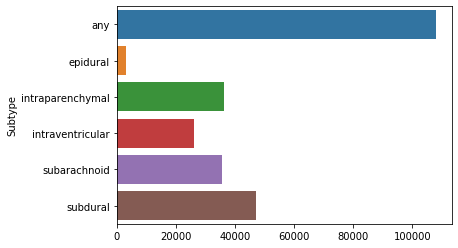

In [15]:
sns.barplot(x=subtype_ct.values, y=subtype_ct.index);

In [16]:
def id_to_filepath(img_id, img_dir=TRAIN_DIR):
    filepath = f'{img_dir}/{img_id}.dcm' # pydicom doesn't play nice with Path objects
    if os.path.exists(filepath):
        return filepath
    else:
        return 'DNE'

In [17]:
train_new['filepath'] = train_new['ID'].apply(id_to_filepath)
train_new.head()

ID Label                                             \
Subtype                 any epidural intraparenchymal intraventricular   
0        ID_000012eaf     0        0                0                0   
1        ID_000039fa0     0        0                0                0   
2        ID_00005679d     0        0                0                0   
3        ID_00008ce3c     0        0                0                0   
4        ID_0000950d7     0        0                0                0   

                               \
Subtype subarachnoid subdural   
0                  0        0   
1                  0        0   
2                  0        0   
3                  0        0   
4                  0        0   

                                                  filepath  
Subtype                                                     
0        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  
1        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  
2        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  
3        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  
4        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...

In [18]:
train_new.to_csv('train_df')